<a href="https://colab.research.google.com/github/alexandra-florea/alexandra-florea/blob/main/010623_dataViz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis with Python

### What is EDA?

Exploratory Data Analysis (**EDA**) is a crucial step in the data science process that involves examining and understanding the structure, characteristics and relationships between the variables within a dataset before advancing to statistical analysis and building predictive models.

The primary goal of EDA is to gain insights about the data by visualising it in different ways (**univariate**ly and **multivariate**ly) and summarising it statistically. 

It allows the analyst to get familiar and understand the data, and to uncover underlying patterns, spot anomalies, test assumptions, and do data `pre-processing` (handling `outliers`, `missing values`, first round of `feature engineering`).

###Key steps in EDA

0. **Data Visualisation**: use graphical representations like `histograms`, `bar charts`, `box plots`, `violin plots`, `scatter plots`, `heat maps`, `correlation charts`, etc., to understand the distribution of data, relationships between variables, and spot trends or patterns
  1. **Data Cleaning**: handle `missing` or `duplicate` data, remove `outliers`
  2. **Data Transformation and Feature Engineering**: normalisation, standardisation, binning, dummifying, 
  3. **Descriptive Statistics**: analyze measures of central tendency (`mean`, `median`, `mode`), dispersion (`range`, `variance`, `standard deviation`) and distribution of the data (`histograms`)


###Data Types


Basic-Data-Types-in-Python_Watermarked.e3dd34457952.avif

A datatype is a formal classification of the type of data being stored or manipulated within a program. 

Understanding data types is important because they determine the types of operations that can be performed on the data.

For example: you can divide one number by another (!!! except for 0: *A `ZeroDivisionError` occurs in Python when a number is attempted to be divided by zero. Since division by zero is not allowed in mathematics, attempting this in Python code raises a ZeroDivisionError*), but you cannot divide a `string` by another. 

There are a few core data types, from which other data types can be created:
- integers (whole numbers, eg. 13)
- floats (real numbers, eg. 3,14159)
- boolean (eg. true/false; yes/no; 1/0)
- string (character, eg. 'hello world') -> categorical data, usually turned to dummies (one popular technique to do so `one-hot encoding`)

###Chart types

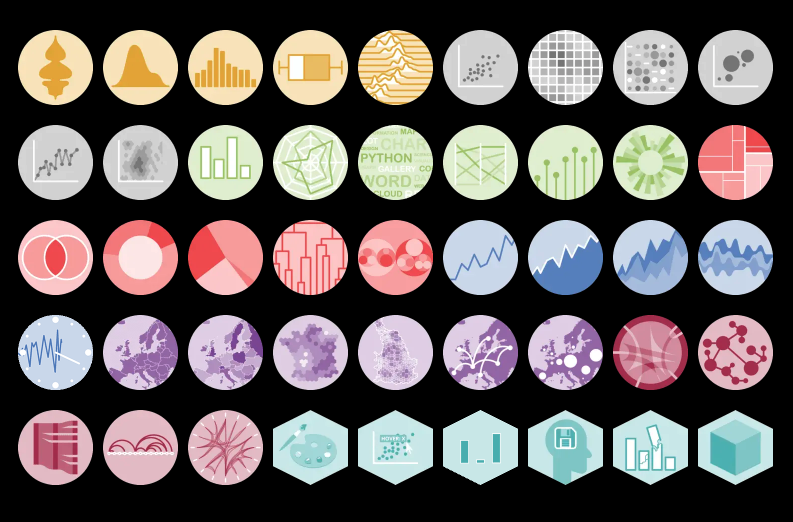

Explore them here: https://www.python-graph-gallery.com/

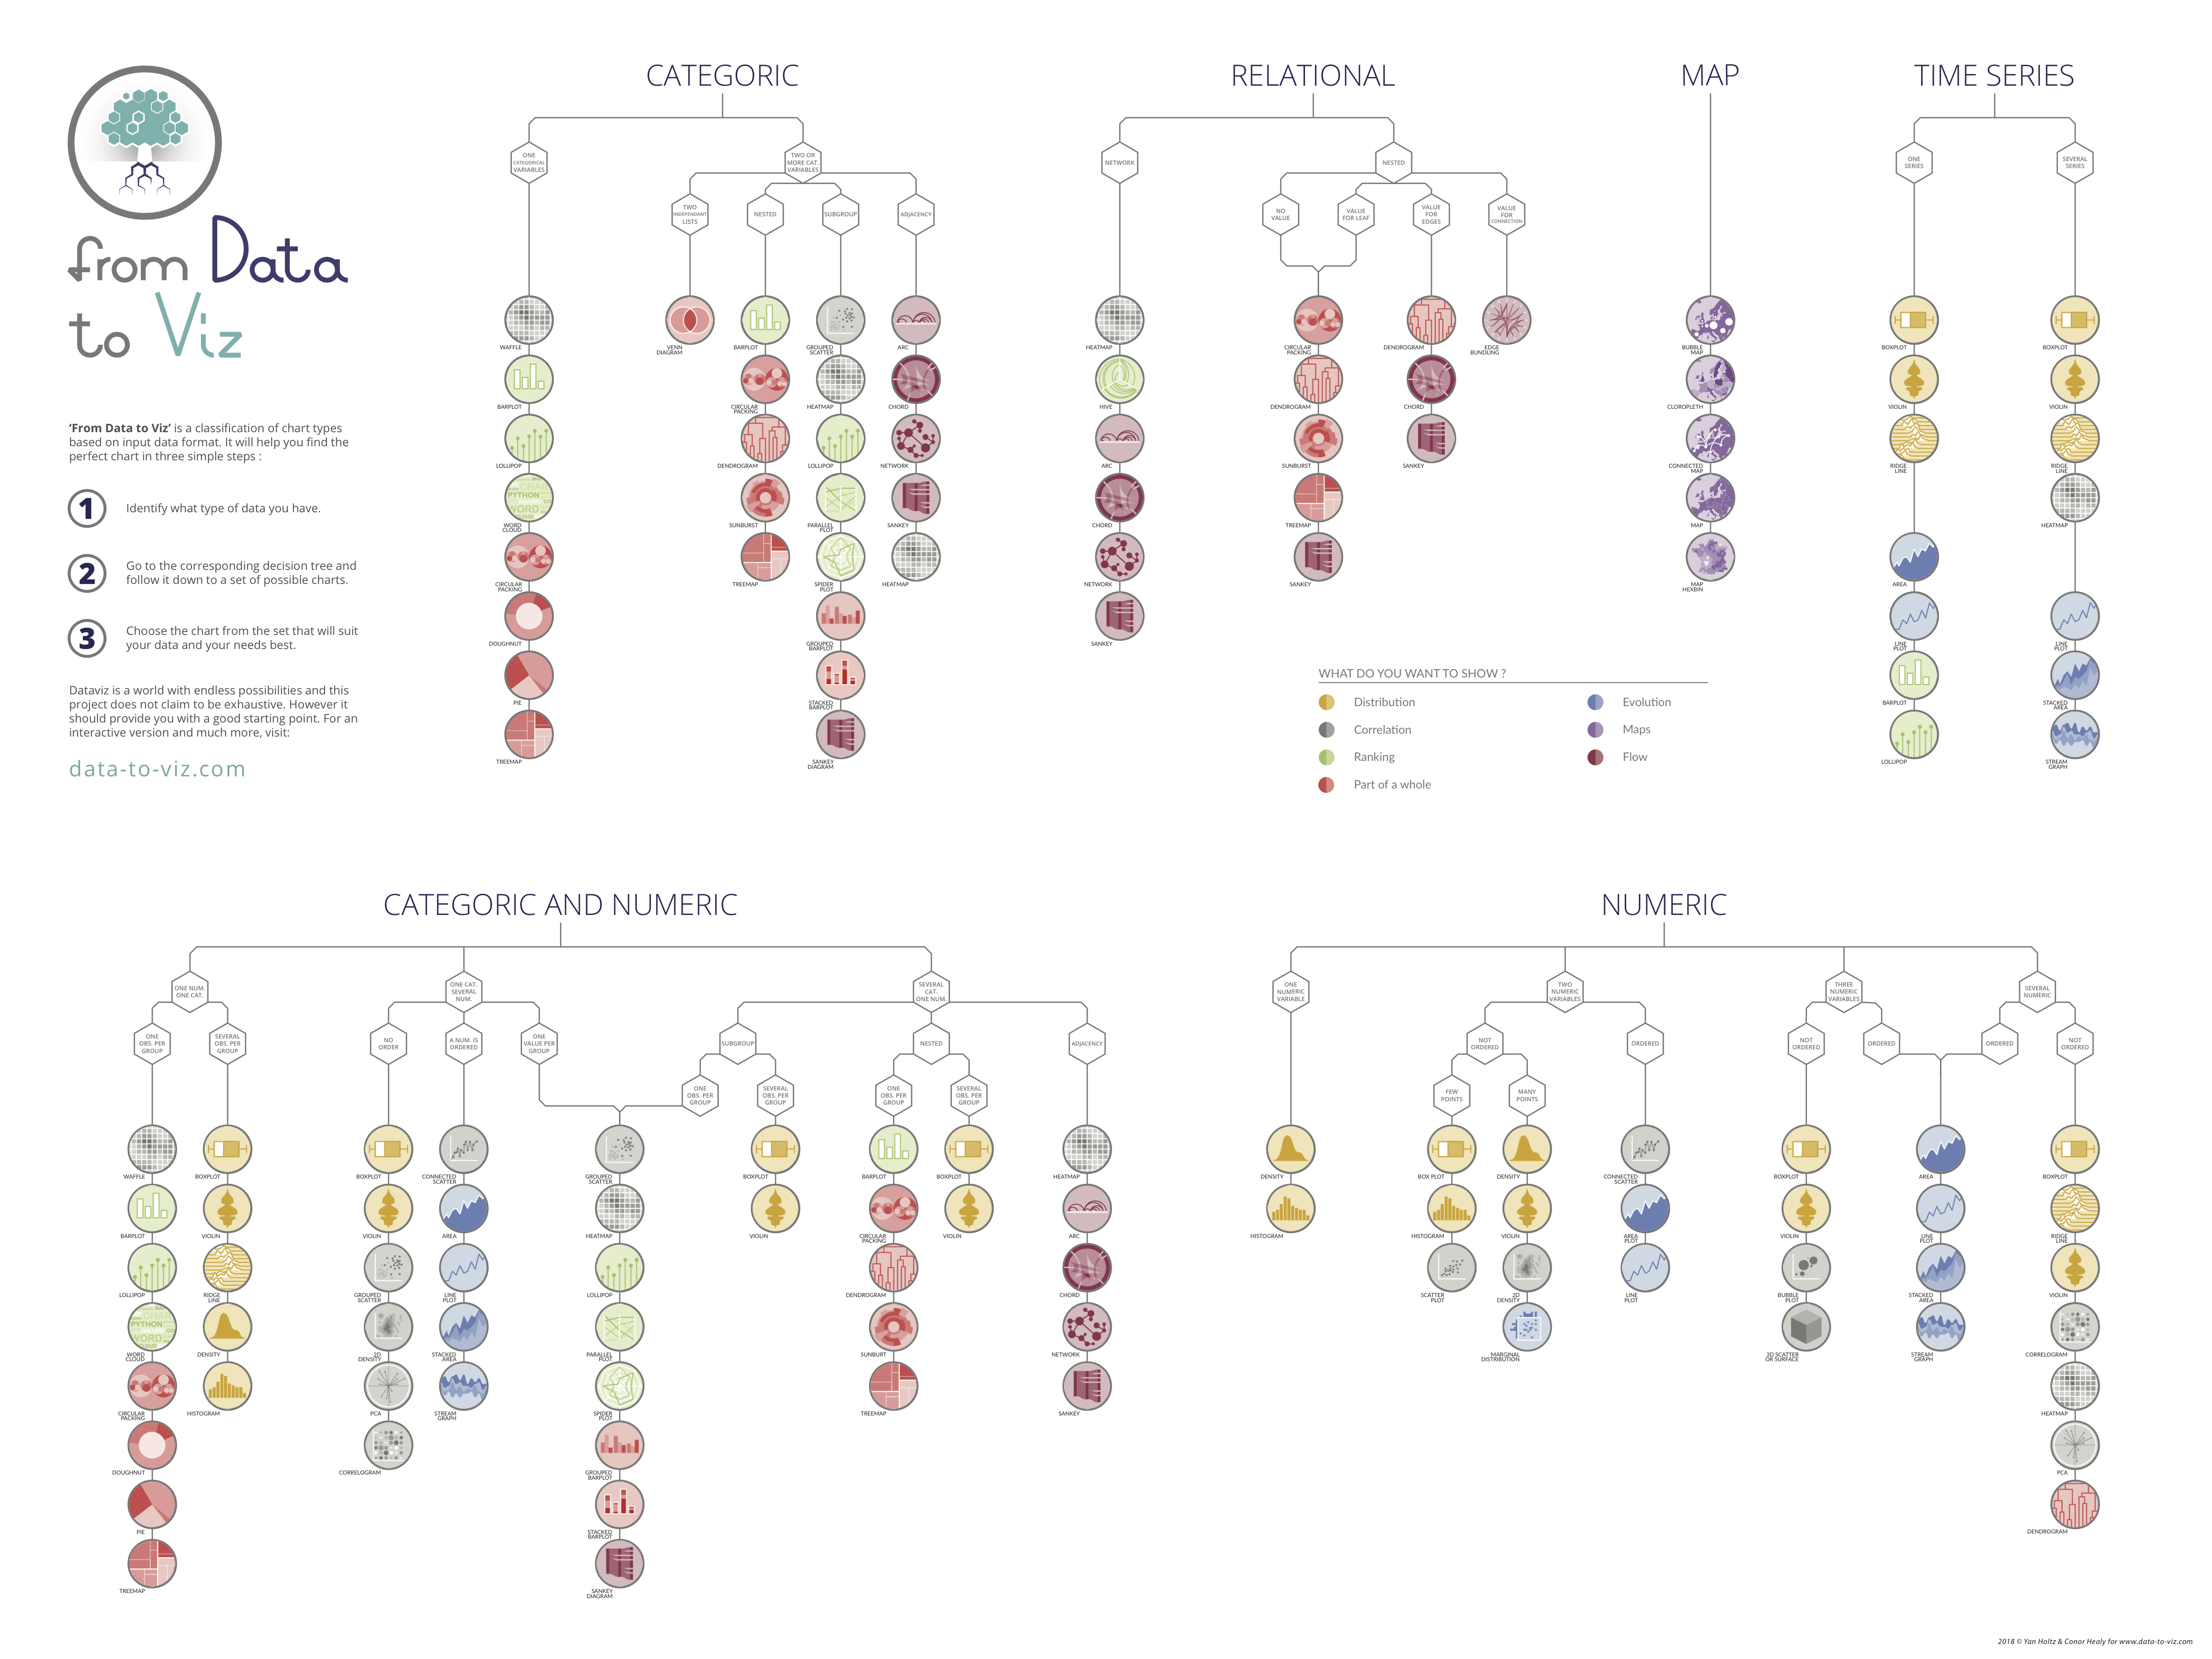

Explore more here: https://www.data-to-viz.com/

### Step-by-step EDA example

#### Load libraries

In [ ]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

#### Loading the Titanic dataset
Let's start by loading the Titanic dataset from seaborn. This dataset contains information about the passengers onboard the Titanic, including whether they survived or not, their ages, their sexes, and so on.


In [ ]:
#load data
titanic = sns.load_dataset("titanic")
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
#rename to df
df = titanic

In [ ]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# get descriptives for the numerical variables
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [ ]:
df.describe(include='all')

survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   891.000000      889    891  891        891  203          889   891   
unique         NaN        3      3    3          2    7            3     2   
top            NaN        S  Third  man       True    C  Southampton    no   
freq           NaN      644    491  537        537   59          644   549   
mean     32.204208      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
std      49.693429      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
min       0.000000      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
25%       7.910400      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
50%      14.454200      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
75%      31.000000      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
max     512.329200      NaN    NaN  NaN        NaN  NaN          NaN   NaN   

       alone  
count    891  
unique     2  
top     True  
freq     537  
mean     NaN  
std      NaN  
min      NaN  
25%      NaN  
50%      NaN  
75%      NaN  
max      NaN

#### Univariate Analysis

##### Histograms

In [ ]:
#histogram for `age` distribution

px.histogram(df, x='age', nbins=30, title='Age distribution')

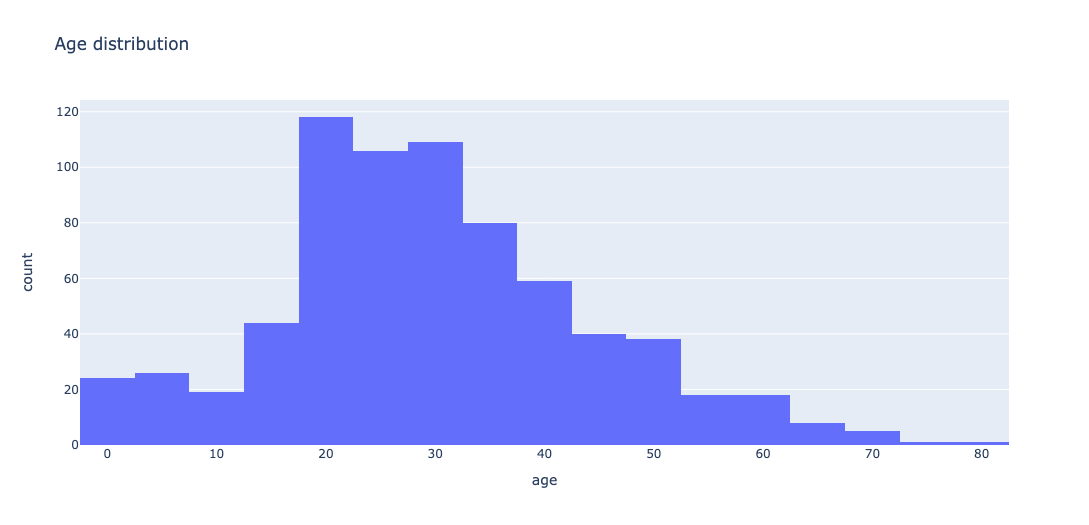

In [ ]:
#histogram for `age` distribution by gender

px.histogram(df, x='age', color='sex', title='Age distribution by Sex', 
             barmode='group',  # This makes bars grouped by gender
             histnorm='percent'  # This normalizes the y-axis to represent percentages
            )

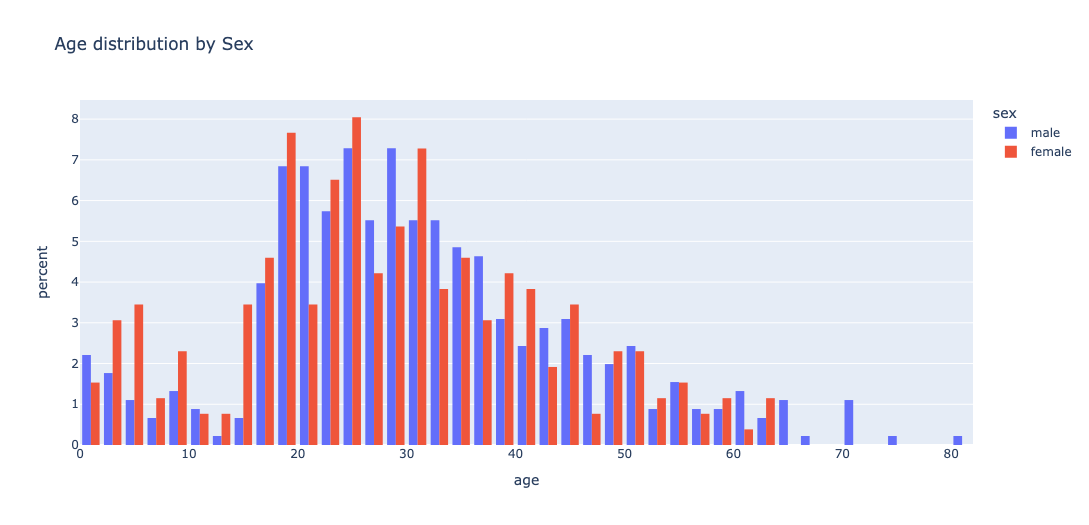

In [ ]:
# Define the color mapping
color_discrete_map = {'male': '#84D2C5', 
                      'female': '#E4C988'}  # Adjust colors as desired (https://colorhunt.co/palette/84d2c5e4c988c27664b05a7a)

px.histogram(df, 
             x='age', 
             color='sex', 
             nbins=30, 
             title='Age distribution by Sex', 
             color_discrete_map=color_discrete_map, 
             barmode='group',  
             histnorm='percent')


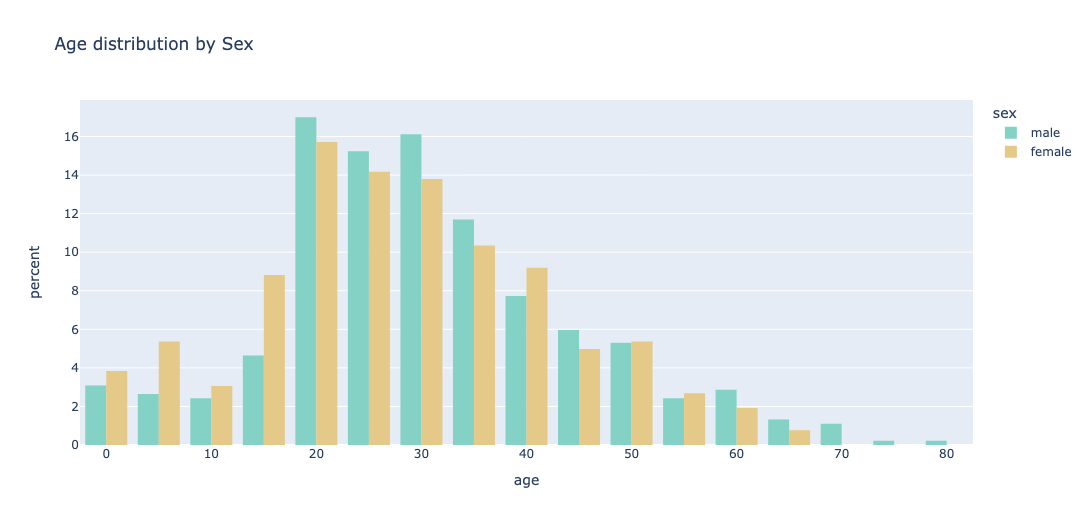

##### Bar Charts

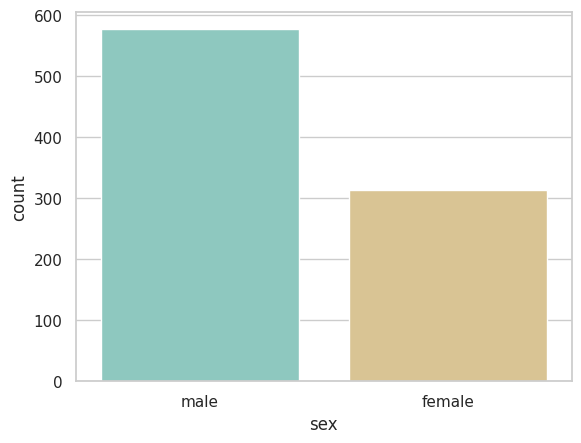

In [ ]:
# Countplot for 'sex'

# Define color mapping
color_dict = {'male': '#84D2C5',
              'female': '#E4C988'}  # Choose your own colors (https://colorhunt.co/palette/84d2c5e4c988c27664b05a7a)

# Countplot for 'sex'
sns.countplot(data=df, x='sex', palette=color_dict)
plt.show()


##### Box-plots

In [ ]:
px.box(df, y='age', title='Boxplot of Age')

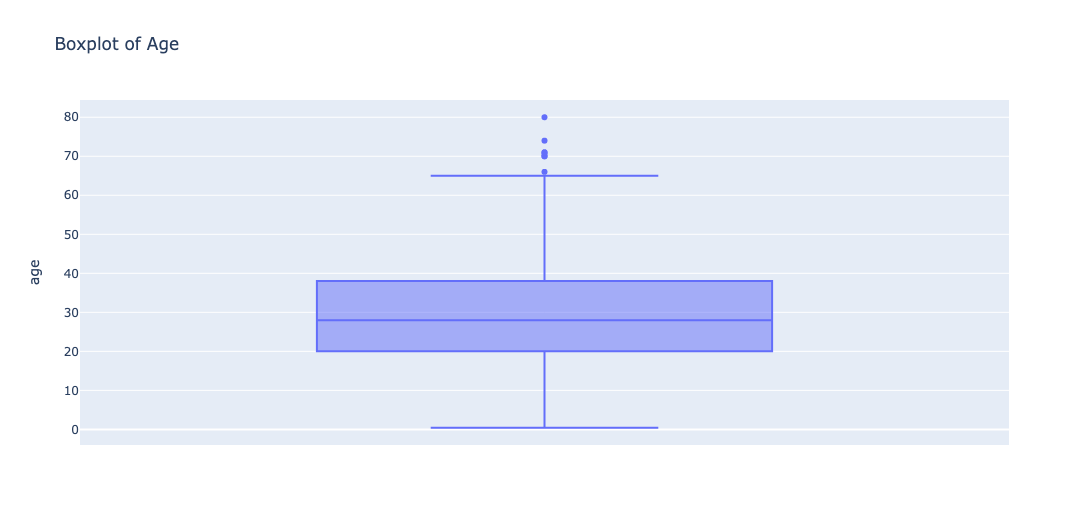

#### Multivariate Analysis

##### Box-plots (cont)

In [ ]:
# Define color mapping
color_discrete_map = {'male': '#84D2C5',
                      'female': '#E4C988'}  # Choose your own colors

px.box(df, 
       x='sex', 
       y='age', 
       color='sex',  # This will apply different colors to each box
       title='Boxplot of Age by Sex',
       color_discrete_map=color_discrete_map  # Apply the color map
       )


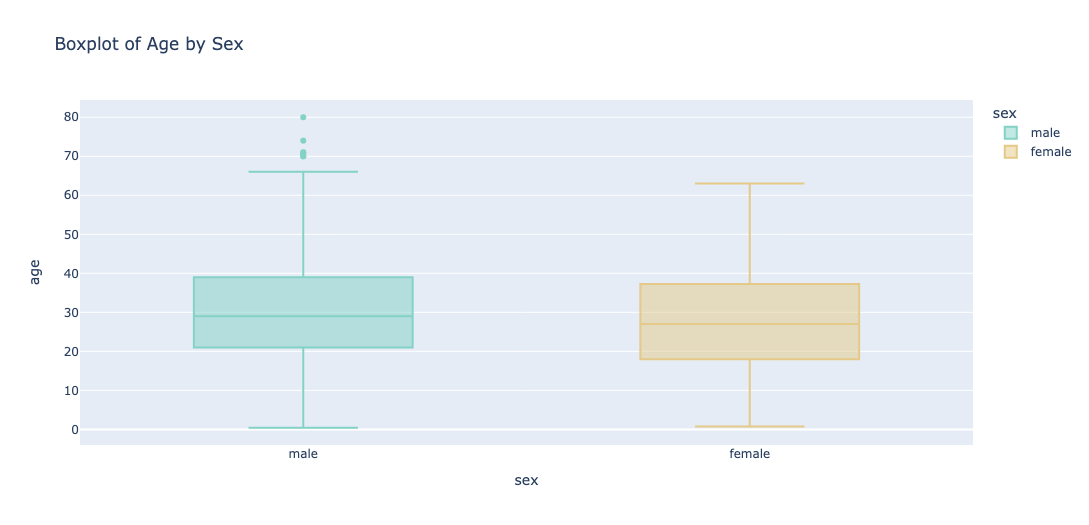

In [ ]:
# boxplots of fare by class

px.box(df,x='pclass',y='age',title='Boxplot of Fare by Passenger Class',labels={'pclass':'Passenger Class', 'fare':'Fare'})


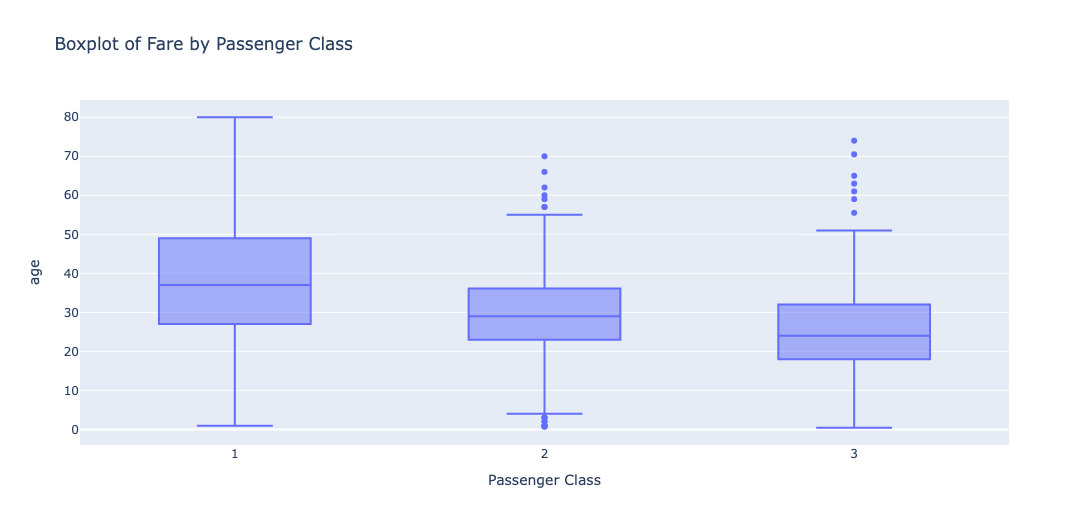

##### Pair Plot

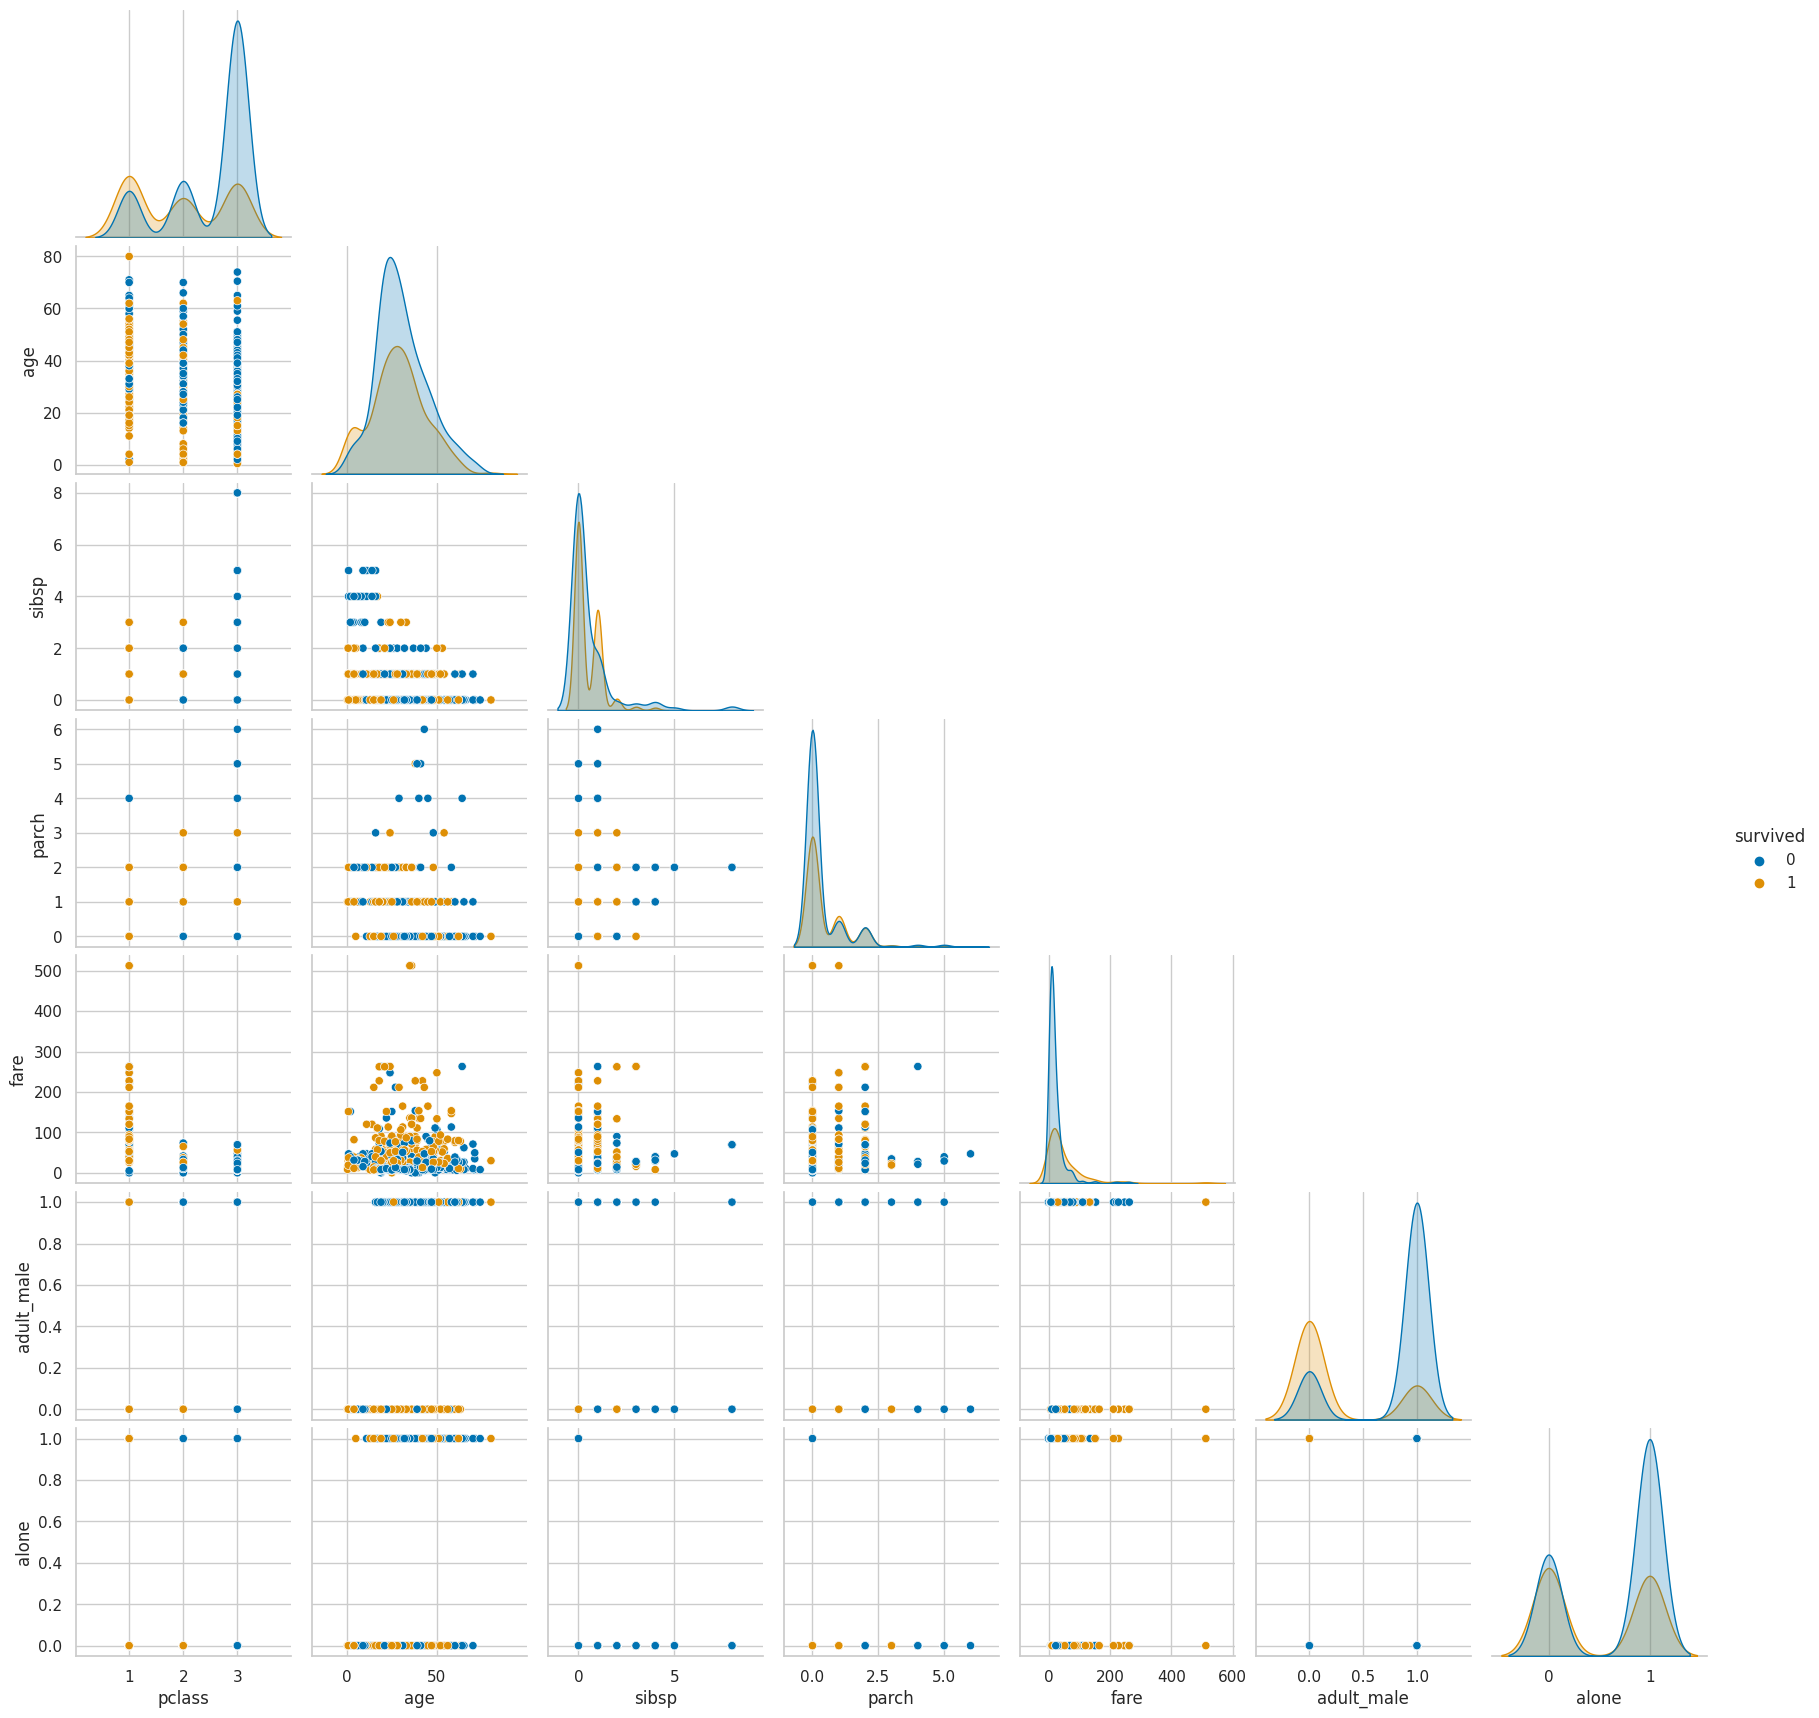

In [ ]:
sns.set_theme(style="whitegrid")

sns.pairplot(df, hue="survived", corner=True, palette="colorblind")

##### Parallel Categories

In [ ]:
fig = px.parallel_categories(df, dimensions=['sex', 'pclass', 'survived'],
                color="age", color_continuous_scale=px.colors.sequential.Bluyl
                )
fig.show()

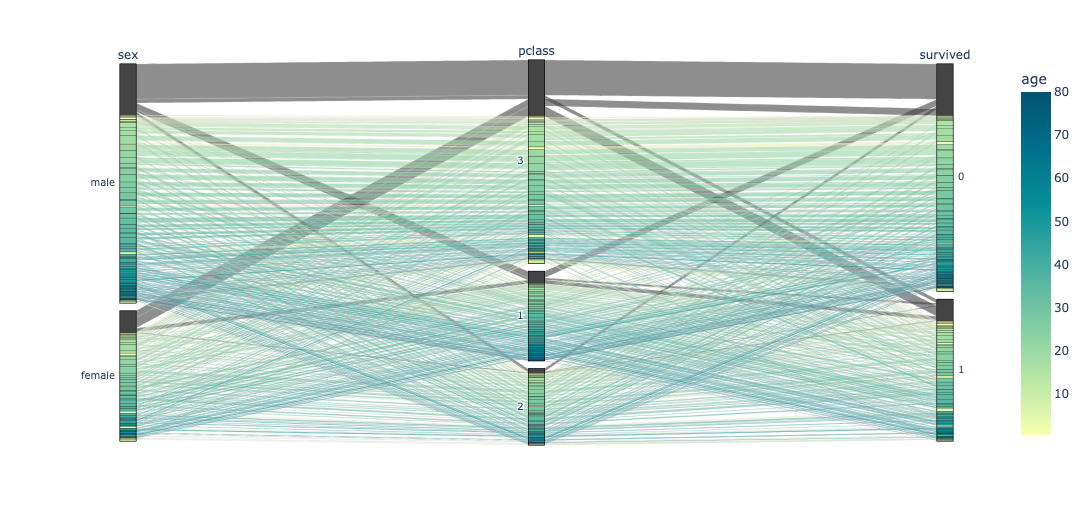

##### Crosstabs

In [ ]:
crosstab = pd.crosstab(df['sex'], df['alive'])

In [ ]:
crosstab

alive    no  yes
sex             
female   81  233
male    468  109

In [ ]:
import plotly.figure_factory as ff

# Create a crosstab table for 'sex' and 'survived'
crosstab = pd.crosstab(df['sex'], df['alive'])

# Create a heatmap from the crosstab table
fig = ff.create_annotated_heatmap(z=crosstab.values, x=list(crosstab.columns), y=list(crosstab.index), colorscale='Blues')

fig.update_layout(title_text='Cross Tabulation - Alive by Gender', title_x=0.5, xaxis=dict(title='Alive'), yaxis=dict(title='Sex'))

fig.show()

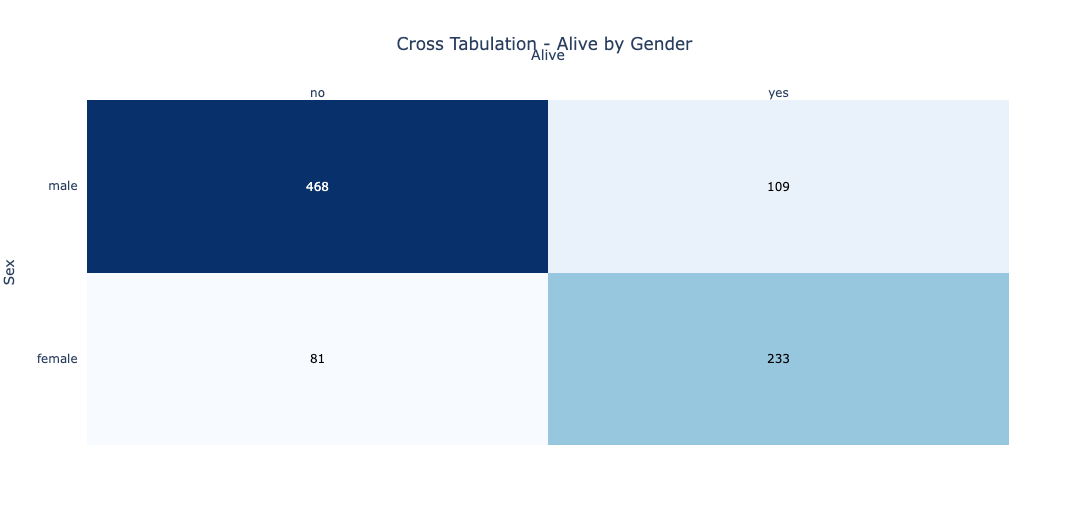

###### Chi-square test of independence

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a crosstab table for 'sex' and 'survived'
crosstab = pd.crosstab(df['sex'], df['survived'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print('There is a significant difference in survival rates by gender')
else:
    print('There is no significant difference in survival rates by gender')



Chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
There is a significant difference in survival rates by gender


###### Double Crosstab 
(just for illustration purposes)

In [ ]:
# Create a crosstab table for 'sex', 'pclass', and 'survived'
crosstab = pd.crosstab([df['sex'], df['pclass']], df['survived'])

print(crosstab)

survived         0   1
sex    pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47


In [ ]:
import plotly.graph_objects as go

# Create a crosstab table for 'sex', 'pclass', and 'survived'
crosstab = pd.crosstab([df['sex'], df['pclass']], df['survived'])

# Reset index to flatten the MultiIndex DataFrame
crosstab = crosstab.reset_index()
crosstab.columns = ['sex', 'pclass', 'not_survived', 'survived']

# Create grouped bar chart
fig = go.Figure()

# Add bars for 'not_survived'
fig.add_trace(go.Bar(
    x=crosstab['sex'] + '-' + crosstab['pclass'].astype(str),
    y=crosstab['not_survived'],
    name='Not Survived',
    marker_color='indianred'
))

# Add bars for 'survived'
fig.add_trace(go.Bar(
    x=crosstab['sex'] + '-' + crosstab['pclass'].astype(str),
    y=crosstab['survived'],
    name='Survived',
    marker_color='lightsalmon'
))

# Update layout
fig.update_layout(barmode='group', title_text='Survival by Sex and Class', xaxis_title='Sex-Class', yaxis_title='Count')
fig.show()

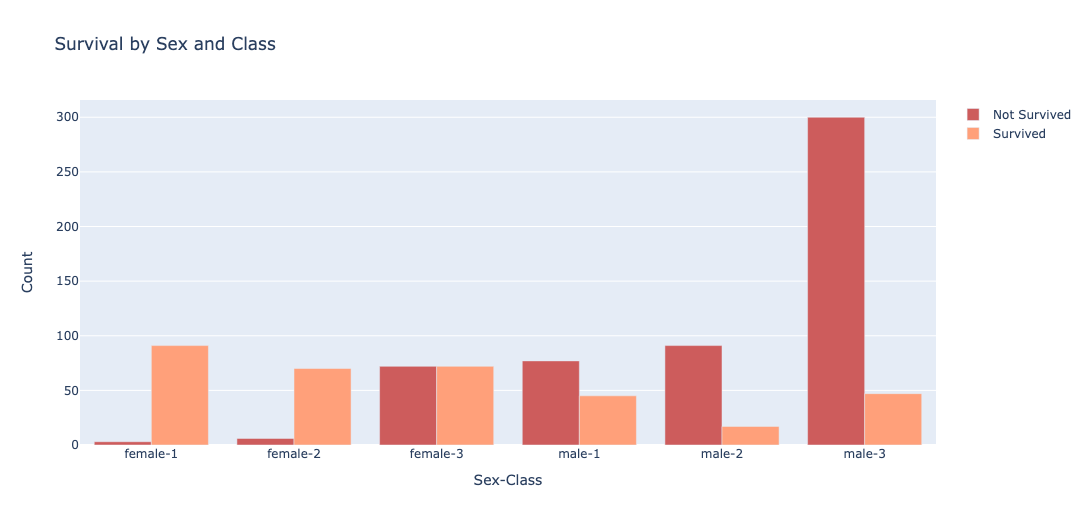

##### Heat-map +

In [ ]:
fig = px.density_heatmap(df, x="age", y="fare", marginal_x="histogram", marginal_y="histogram")
fig.show()

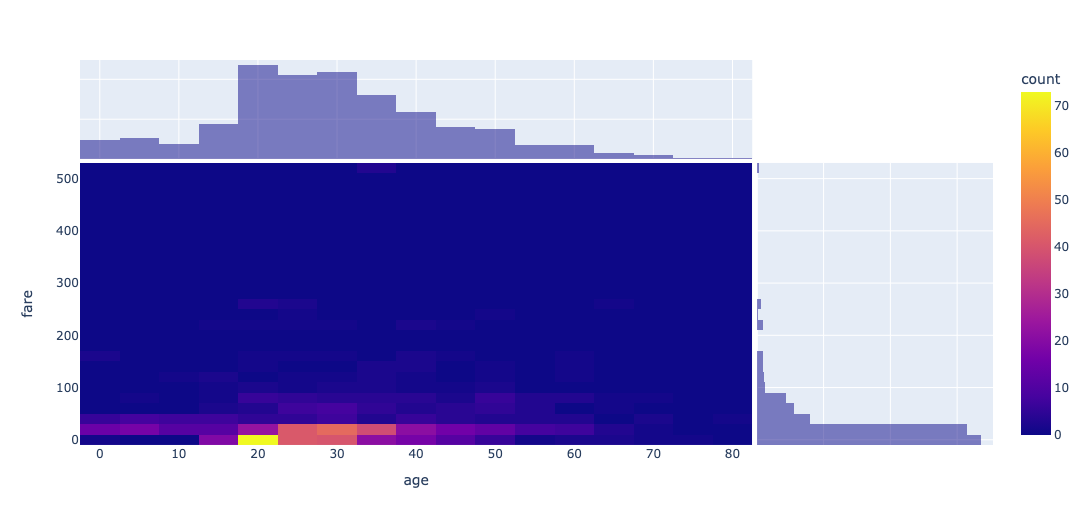

In [ ]:
fig = px.density_heatmap(df, x="age", y="fare",facet_col="sex")
fig.show()

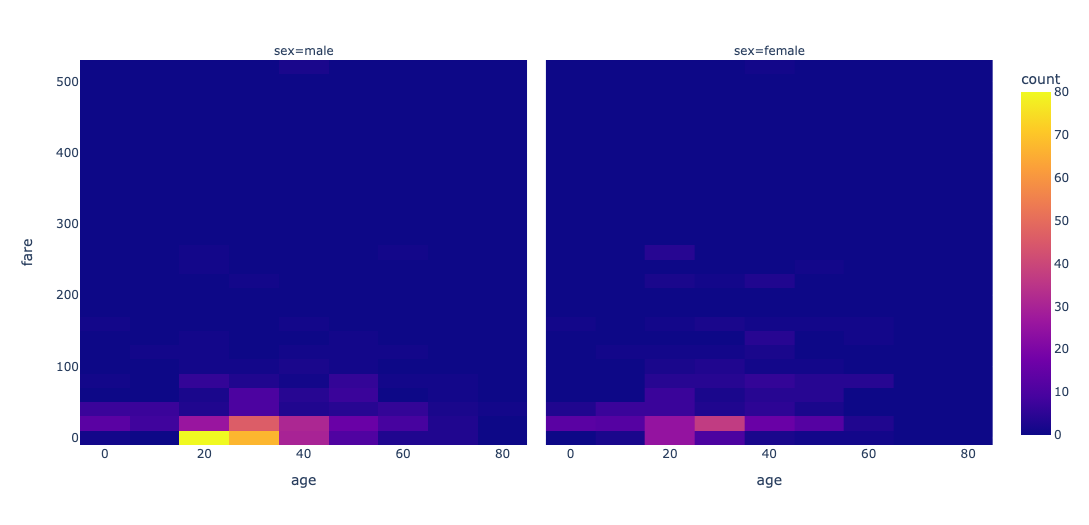

In [ ]:
import plotly.graph_objects as go

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='Turbo',
))

fig.update_layout(
    title='Correlation Matrix',
    xaxis_title='Variables',
    yaxis_title='Variables',
)

fig.show()


<ipython-input-24-030966891c9c>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



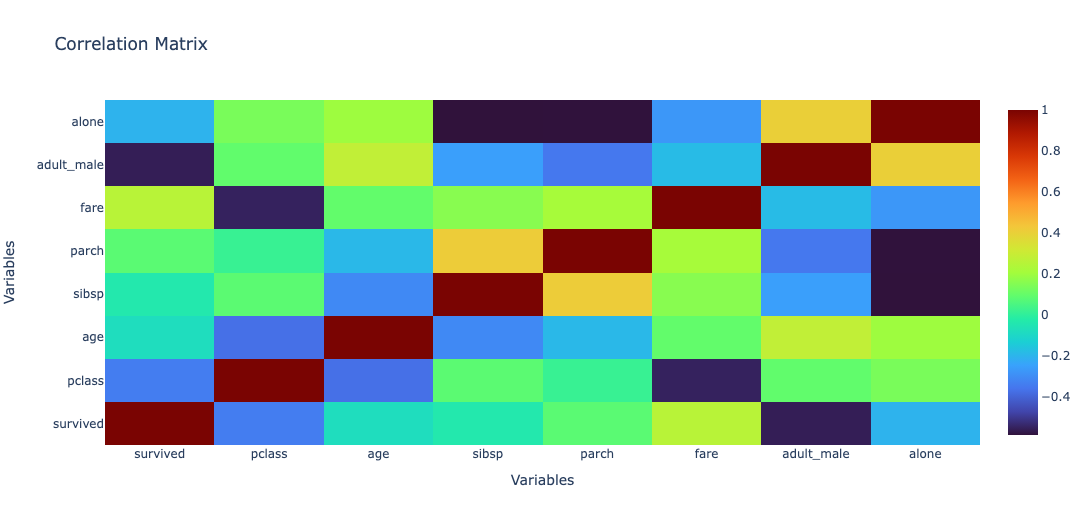

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set upper triangle values to NaN
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix = corr_matrix.where(mask)

# Create a heatmap of the diagonal half of the correlation matrix
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdYlGn',
))

fig.update_layout(
    title='Correlation Matrix (Diagonal Half)',
    xaxis_title='Variables',
    yaxis_title='Variables',
)

fig.show()


<ipython-input-25-48302465af86>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



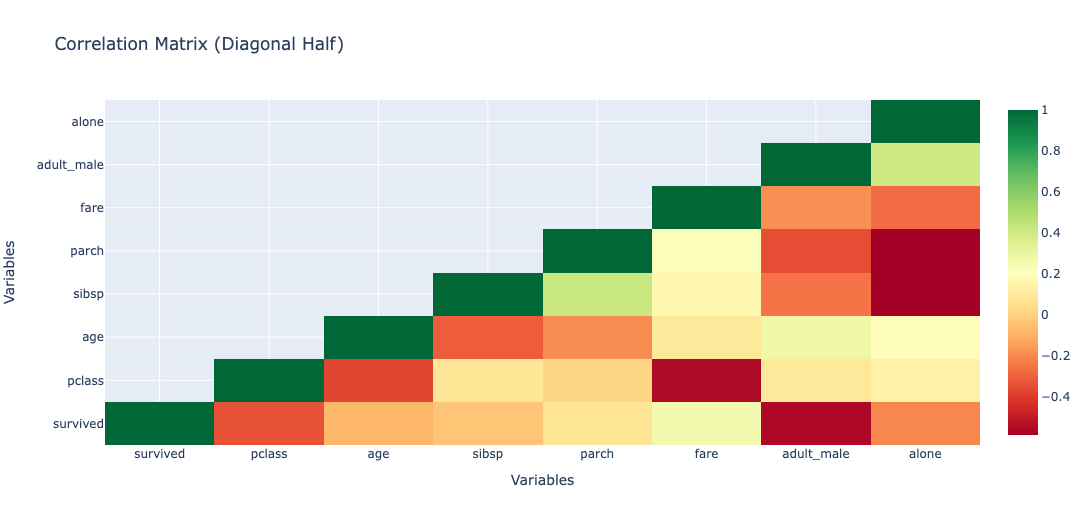

These correlation matrixes are not quite right.

Let's discuss why that might be the case. 

In [ ]:
%%shell
jupyter nbconvert /content/dataViz3.ipynb --to html

[NbConvertApp] Converting notebook /content/dataViz3.ipynb to html
[NbConvertApp] Writing 4821660 bytes to /content/dataViz3.html
